## SGD (stochastic gradient descent) in code
Estimate $\beta$ of a logistic regression with SGD

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [19]:
# Data simulation
N = 1000
B = 10000
lr = 0.01

np.random.seed(100)

def sigmoid(alpha, beta, x):
    z = np.exp(alpha + beta*x)/(1+np.exp(alpha + beta*x))
    return z

x = np.random.uniform(-10, 10, N)
alpha = 9
beta = 4.15

p = sigmoid(alpha, beta, x)
y = (p > 0.5)*1

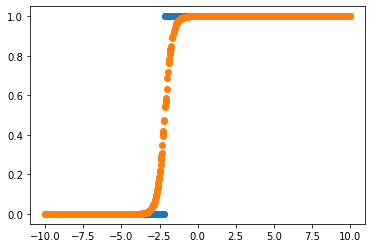

In [4]:
plt.scatter(x, y)
plt.scatter(x, p)

### SGD

In [2]:
alpha_hat, beta_hat = 10, 0
alpha_hat_list, beta_hat_list = [], []

for b in range(B):
    i = b % N
    p_i = sigmoid(alpha_hat, beta_hat, x[i])
    
    grad_alpha = (p_i-y[i])
    grad_beta =  (x[i]*(p_i-y[i]))
    
    alpha_hat -=  lr*grad_alpha
    beta_hat -=  lr*grad_beta
    
    alpha_hat_list.append(alpha_hat)
    beta_hat_list.append(beta_hat)


In [3]:
X = np.c_[np.ones((x.shape[0], 1)), x]

[[ 0.4494519  20.14790707]]


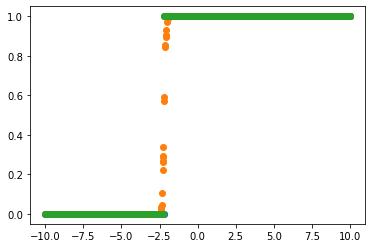

In [5]:
from sklearn.linear_model import LogisticRegression as log_reg
from sklearn.linear_model import SGDClassifier as sgd

model = sgd(loss="log")
model = model.fit(X, y)
print(model.coef_)

plt.scatter(x, y)
plt.scatter(x, model.predict_proba(X)[:, 1])
plt.scatter(x, model.predict(X))

([<matplotlib.lines.Line2D at 0x7fa3688a60d0>], 8.961892608298463)

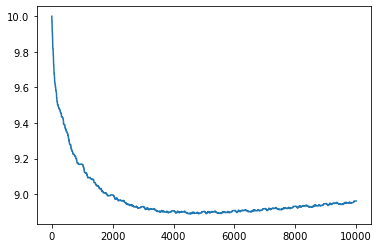

In [6]:
plt.plot(alpha_hat_list), alpha_hat_list[-1]

([<matplotlib.lines.Line2D at 0x7fa39b8e56d0>], 4.235987126672914)

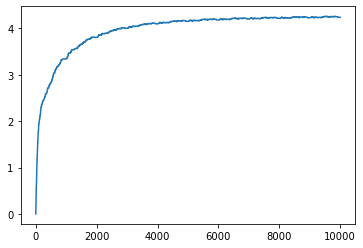

In [7]:
plt.plot(beta_hat_list), beta_hat_list[-1]

### Gradient descent

In [9]:
alpha_hat, beta_hat = 10, 0
alpha_hat_list, beta_hat_list = [], []

for b in range(B):
    p = sigmoid(alpha_hat, beta_hat, x)
    
    grad_alpha = 1/N*np.sum(p-y)
    grad_beta =  1/N*np.sum(x*(p-y))
    
    alpha_hat -=  lr*grad_alpha
    beta_hat -=  lr*grad_beta
    
    alpha_hat_list.append(alpha_hat)
    beta_hat_list.append(beta_hat)



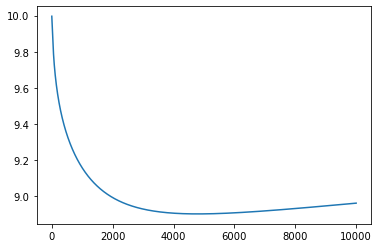

In [10]:
plt.plot(alpha_hat_list)

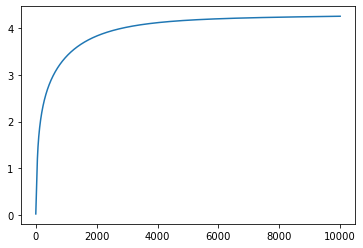

In [11]:
plt.plot(beta_hat_list)